# Ипотечный калькулятор 
Реализовал два метода подсчета:

__В аннуитентном__ методе расчитывается по формуле:


$$ P = S \cdot \frac{r \cdot (1 + r)^n}{(1 + r)^n - 1}  $$, где 

$P$ = ежемесечная выплата

$S$ = сумма кредита за вычетом первоначального взноса

$r$ = месячная процентная ставка (доля от единицы)

$n$ = общее количесвто платежей



__В дифференцированном__ методе ежемесечная выплата считается по формуле:


$$ P_t = \frac{S}{n} + \left(S - \frac{S}{n} \cdot (t-1)\right) \cdot r $$, где 

$P_t$ = ежемесечная выплата в месяце $t$

$S$ = сумма кредита за вычетом первоначального взноса

$r$ = месячная процентная ставка (доля от единицы)

$n$ = общее количесвто платежей

$t$ = номер текущего месяца платежа


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Введите сумму кредита: 13000000
Введите процент: 8
Введите срок (в месяцах): 240
   Месяц  Платеж по основному долгу  Платеж по процентам  Сумма платежа  \
0      1                   54166.67             86666.67      140833.33   
1      2                   54166.67             86305.56      140472.22   
2      3                   54166.67             85944.44      140111.11   
3      4                   54166.67             85583.33      139750.00   
4      5                   54166.67             85222.22      139388.89   

   Остаток по долгу  
0       12945833.33  
1       12891666.67  
2       12837500.00  
3       12783333.33  
4       12729166.67  
     Месяц  Платеж по основному долгу  Платеж по процентам  Сумма платежа  \
235    236                   54166.67              1805.56       55972.22   
236    237                   54166.67              1444.44       55611.11   
237    238                   54166.67              1083.33       55250.00   
238    239                  

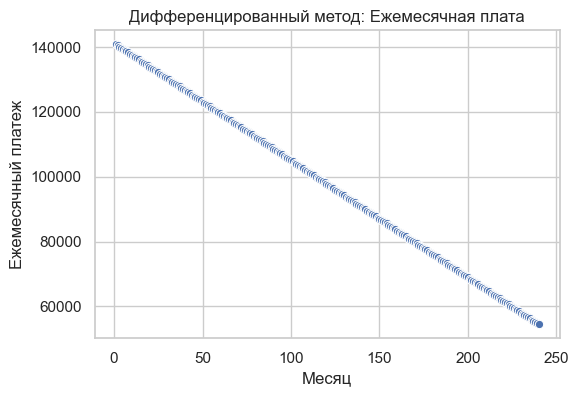

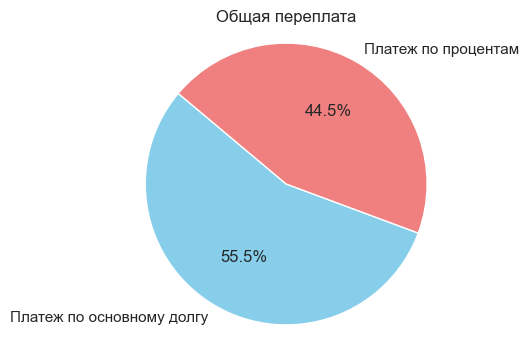

Общая выплата: 23443333.33.
Сумма кредита: 13000000.0. 
Сумма по процентам: 10443333.333333384


In [3]:

def calc_diff_payment(S, r, n):
    month_r_rate = r / 12 / 100
    princ_S = S / n
    payments_data = []
    remaining_s = S
    total_interest = 0
    
    for month in range(1, n + 1):
        interest_payment = remaining_s * month_r_rate
        princ_payment = princ_S
        total_payment = princ_payment + interest_payment
    
        payments_data.append([month, round(princ_payment, 2), round(interest_payment, 2), round(total_payment, 2), round(remaining_s - princ_payment, 2)])  
        total_interest += interest_payment
        remaining_s -= princ_payment
        
    payments_df = pd.DataFrame(payments_data, columns=['Месяц', 'Платеж по основному долгу', 'Платеж по процентам', 'Сумма платежа', 'Остаток по долгу'])
    payments_df = payments_df.reset_index(drop=True)
    return payments_df, total_interest

if __name__ == '__main__':
    S = float(input('Введите сумму кредита: '))
    r = float(input('Введите процент: '))
    n = int(input('Введите срок (в месяцах): '))
    
    if S <= 0 or r <= 0 or n <= 0 or n > 12 * 30:
        print("Ошибка: Пожалуйста, введите положительные значения для суммы кредита, процентной ставки и срока кредита, не превышающего 30 лет.")
    else:
        month_payment_df, total_interest = calc_diff_payment(S, r, n)
        month_payment_df = month_payment_df.reset_index(drop=True) 
        print(month_payment_df.head(5))
        print(month_payment_df.tail(5))

        sns.set(style="whitegrid")
        plt.figure(figsize=(6, 4))
        sns.lineplot(data=month_payment_df, x='Месяц', y='Сумма платежа', marker='o', color='b')
        plt.title('Дифференцированный метод: Ежемесячная плата')
        plt.xlabel('Месяц')
        plt.ylabel('Ежемесячный платеж')
        plt.show()

        total_overpayment = total_interest + S

        plt.figure(figsize=(4, 4))
        plt.pie([S, total_interest], labels=['Платеж по основному долгу', 'Платеж по процентам'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
        plt.title('Общая переплата')
        plt.axis('equal')
        plt.show()

        print(f'Общая выплата: {total_overpayment:.2f}.\nСумма кредита: {S}. \nСумма по процентам: {total_interest}')


In [15]:
def calc_annuity_factor(r, t):
    return r * ((1 + r)**t) / (((1 + r)**t) - 1)

def calc_annuity_payment(P, r):
    return P * r

def _annuity_payments(P, r, n):
    payments_data = []
    remaining_principal = P
    total_interest = 0
    
    for month in range(1, n + 1):
        interest_payment = remaining_principal * r
        princ_payment = monthly_payment - interest_payment
        remaining_principal -= princ_payment
        
        payments_data.append([month, round(princ_payment, 2), round(interest_payment, 2), round(remaining_principal, 2)])
        total_interest += interest_payment
        
    payments_df = pd.DataFrame(payments_data, columns=['Месяц', 'Платеж по основному долгу', 'Платеж по процентам', 'Остаток по долгу'])
    return payments_df, total_interest


P = float(input("Введите сумму кредита: "))  
annual_interest_rate = float(input("Введите годовую процентную ставку: "))  
r = annual_interest_rate / 12 / 100  
n = int(input("Введите срок кредита в месяцах: "))  

annuity_factor = calc_annuity_factor(r, n)
monthly_payment = calc_annuity_payment(P, annuity_factor)

annuity_payments_df, total_interest = _annuity_payments(P, r, n)
print("Таблица ежемесячных платежей:")
print(annuity_payments_df)
print(f'\nОбщая сумма переплаты по процентам: {round(total_interest, 2)}\nЕжемесячный платеж:{round(monthly_payment)}')


Введите сумму кредита: 13000000
Введите годовую процентную ставку: 8
Введите срок кредита в месяцах: 240
Таблица ежемесячных платежей:
     Месяц  Платеж по основному долгу  Платеж по процентам  Остаток по долгу
0        1                   22070.54             86666.67       12977929.46
1        2                   22217.68             86519.53       12955711.78
2        3                   22365.80             86371.41       12933345.98
3        4                   22514.90             86222.31       12910831.08
4        5                   22665.00             86072.21       12888166.08
..     ...                        ...                  ...               ...
235    236                  105184.01              3553.19         427795.23
236    237                  105885.24              2851.97         321909.99
237    238                  106591.14              2146.07         215318.85
238    239                  107301.75              1435.46         108017.10
239    240        